# Verifiable Simple Linear Regression model

Simple Linear Regression model is a foundational technique used to determine the linear relationship between an independent variables (predictors) and a dependent variable (outcome) . By identifying the line of best fit, we can make informed predictions based on new data points or decipher how changes in one variable may lead to changes in another. 

The following is a small run through of the implementation of a Simple Linear Regression model using <b>Ordinary Least Squares</b> (OLS) in python, which we will in later stages convert it to Cairo  to turn it into a  <b>"Verifiable Linear Regression model" </b>. By utilysing the <b>Orion's</b> library we will be able to add an extra layer of transparency and robustness enabling us to make <b>verifiable inferences</b>  which  can be easily <b>proved</b> using the LambdaClass STARK Prover.

In this particular exercise, we'll replicate the entire linear regression model in Cairo. This approach will not only enable us to validate each individual inference made to the model but also allow us to verify all the steps executed during the model's construction phase also. This is to provide an opportunity to get familiar with Orion's main functions and operators along the process. 


# Generate a synthetic dataset

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Constants for reproducibility
SEED = 42
np.random.seed(SEED)


X = np.linspace(-10, 25, 150).astype('int8')
noise = np.random.normal(0, 10, len(X)).astype('int8')
y = 2 * X + 5 + noise # y=2x+5 + error

print('X values = ',X)
print('y values = ', y)
   


X values =  [-10  -9  -9  -9  -9  -8  -8  -8  -8  -7  -7  -7  -7  -6  -6  -6  -6  -6
  -5  -5  -5  -5  -4  -4  -4  -4  -3  -3  -3  -3  -2  -2  -2  -2  -2  -1
  -1  -1  -1   0   0   0   0   0   0   0   0   1   1   1   1   1   2   2
   2   2   3   3   3   3   4   4   4   4   5   5   5   5   5   6   6   6
   6   7   7   7   7   8   8   8   8   9   9   9   9   9  10  10  10  10
  11  11  11  11  12  12  12  12  13  13  13  13  13  14  14  14  14  15
  15  15  15  16  16  16  16  17  17  17  17  17  18  18  18  18  19  19
  19  19  20  20  20  20  21  21  21  21  21  22  22  22  22  23  23  23
  23  24  24  24  24  25]
y values =  [-11 -14  -7   2 -15 -13   4  -4 -15  -4 -13 -13  -7 -26 -24 -12 -17  -4
 -14 -19   9  -7  -3 -17  -8  -2 -12   2  -7  -3  -5  19   1  -9   9  -9
   5 -16 -10   6  12   6   4   2  -9  -2   1  17  10 -10  10   4   3  15
  19  18   3   8  14  20   9  12   2   2  23  28  15  25  18  11  20  32
  17  34  -7  27  19  19  21   2  19  26  37  18  15  18  34  28  20  30
 

Text(0, 0.5, 'y values')

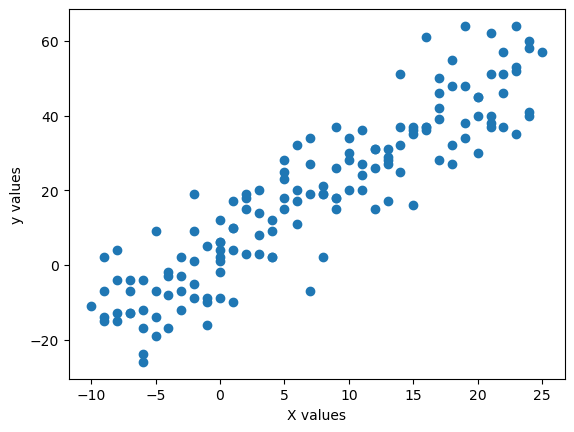

In [6]:
plt.scatter(X,y)
plt.xlabel('X values')
plt.ylabel('y values')

# Equation of a straight line 

<br>

<img src="line_equation.gif" width="200px" height="200px" align="left">   <br><br>

**y:** y values  
**x:** x values  
**b:** gradient  
**a:** y intercept  


# Calculating the gradient of the line of best fit
<br>

<img src="gradient.png" width="230px" height="230px" align="left">

In [7]:
numerator = sum((X - X.mean()) * (y - y.mean()))
denominator = sum((X - X.mean())**2)

beta = numerator / denominator
print('The slope of regression line:', beta)

The slope of regression line: 2.0315325245038856


# Calculating the y intercept

<br>

<img src="intercept.png" width="150px" height="150px" align="left">

In [8]:
intercept = y.mean() - beta * X.mean()
print('The y intercept of our regression line:', intercept)

The y intercept of our regression line: 3.916899671448352


In [9]:
# making new predictions using our model
predicted_y_value = beta * 17 + intercept 
print(f'Given x=17 , our model predicts the corresponing y value shoud be {predicted_y_value}')

Given x=17 , our model predicts the corresponing y value shoud be 38.45295258801441


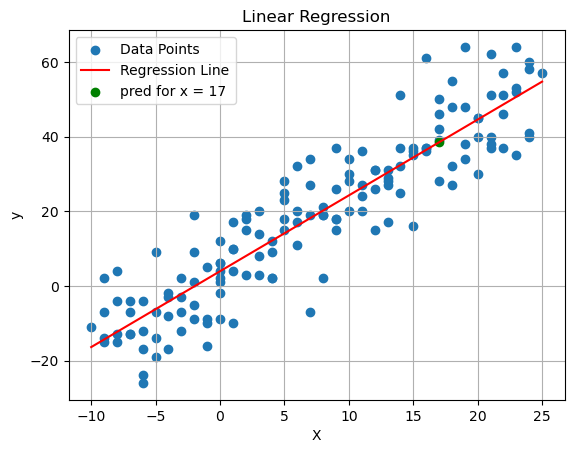

Calculated beta: 2.0315325245038856
Calculated intercept: 3.916899671448352


In [10]:
plt.scatter(X, y, label='Data Points')
plt.plot(X, beta * X + intercept, color='red', label='Regression Line')
plt.scatter(17,predicted_y_value, color='green', label='pred for x = 17 ')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


print(f"Calculated beta: {beta}")
print(f"Calculated intercept: {intercept}")


# Calculating the accuracy of our linear regression model




In [11]:
y_pred = beta * X + intercept

mse = np.mean((y - y_pred)**2)
y_mean = np.mean(y)
r_squared = 1 - np.sum((y - y_pred)**2) / np.sum((y - y_mean)**2)


print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r_squared)



Mean Squared Error (MSE): 81.78873049706822
R-squared (R^2): 0.8303237877258618


#  Replicating the linear regression model using the Orion library



### Create a scarb project 
Scarb is the Cairo package manager specifically created to streamline our Cairo and Starknet development process. You can find all information about Scarb and Cairo installation <a src='https://github.com/gizatechxyz/orion/blob/develop/docs/framework/get-started.md#installations'>here</a>

In [ ]:
! scarb new verifiable_linear_regression

A new project folder will be created for you and make sure to replace the content in Scarb.toml file with the following code:

```tom
[package]
name = "verifiable_linear_regression"
version = "0.1.0"

[dependencies]
orion = { git = "https://github.com/gizatechxyz/orion.git", branch = "develop"   }

[scripts]
test = "scarb cairo-test -f linear_regression_test"

```


### Generate the x and y values in cairo and importing the neccessary libs



In [3]:
tensor_name =['X_values', 'Y_values']

def generate_cairo_files(data, name):
    
    os.makedirs('src/generated', exist_ok=True)
    with open(os.path.join('src', 'generated', f"{name}.cairo"), "w") as f:
            f.write(
                "use array::ArrayTrait;\n" +
                "use orion::operators::tensor::core::{TensorTrait, Tensor, ExtraParams};\n" +
                "use orion::operators::tensor::implementations::impl_tensor_i32::Tensor_i32;\n" +
                "use orion::numbers::signed_integer::i32::i32;\n\n" +
                "use orion::numbers::fixed_point::core::{FixedTrait, FixedType, FixedImpl};\n"
                "use orion::operators::tensor::implementations::impl_tensor_fp::Tensor_fp;\n"
                "use orion::numbers::fixed_point::implementations::impl_16x16::{FP16x16Impl, FP16x16Into, FP16x16PartialEq }; \n"+
                "fn {0}() -> Tensor<FixedType>  ".format(name) + "{\n" +
                "    let mut shape = ArrayTrait::new();\n"
            )
            for dim in data.shape:
                f.write("    shape.append({0});\n".format(dim))
            f.write(
                "    let mut data = ArrayTrait::new();\n"
            )
            for val in np.nditer(data.flatten()):
                f.write("    data.append(FixedTrait::new_unscaled({0}, {1} ));\n".format(abs(int(val)), str(val < 0).lower()))
            f.write(
                "let extra = ExtraParams { fixed_point: Option::Some(FixedImpl::FP16x16(())) }; \n" +
                "let tensor = TensorTrait::<FixedType>::new(shape.span(), data.span(), Option::Some(extra)); \n \n" +
                "return tensor;\n\n"+
                "}\n"
            )
    with open(os.path.join('src', 'generated.cairo'), 'w') as f:
        for param_name in tensor_name:
            f.write(f"mod {param_name};\n")

In [12]:
generate_cairo_files(X, 'X_values')
generate_cairo_files(y, 'Y_values')

## Building our OLS functions in cairo using Orion lib

In [1]:
! touch ../src/lin_reg_func.cairo

'touch' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
%%writefile ../src/lin_reg_func.cairo

use core::array::SpanTrait;
use traits::Into;
use debug::PrintTrait;
use array::ArrayTrait;

use orion::operators::tensor::math::cumsum::cumsum_i32::cumsum;
use orion::operators::tensor::implementations::{impl_tensor_u32::Tensor_u32, impl_tensor_fp::Tensor_fp};
use orion::operators::tensor::core::{TensorTrait, Tensor, ExtraParams};
use orion::operators::tensor::math::arithmetic::arithmetic_fp::core::{add, sub, mul, div};
use orion::numbers::fixed_point::core::{FixedTrait, FixedType, FixedImpl};
use orion::numbers::fixed_point::implementations::impl_16x16::{
    FP16x16Impl, FP16x16Add, FP16x16AddEq, FP16x16Into, FP16x16Print, FP16x16PartialEq, FP16x16Sub,
    FP16x16SubEq, FP16x16Mul, FP16x16MulEq, FP16x16Div, FP16x16DivEq, FP16x16PartialOrd, FP16x16Neg
};

use orion::operators::tensor::linalg::matmul::matmul_fp::core::matmul;

/// Calculates the mean of a given 1D tensor.
fn calculate_mean(tensor_data: Tensor<FixedType>) -> FixedType {

    let tensor_size = FP16x16Impl::from_unscaled_felt(tensor_data.data.len().into());

    let cumulated_sum = tensor_data.cumsum(0, Option::None(()), Option::None(()));
    let sum_result = cumulated_sum.data[tensor_data.data.len()  - 1];
    let mean = FP16x16Div::div(*sum_result, tensor_size);

    return mean;
}

/// Calculates the deviation of each element from the mean of the provided 1D tensor.
fn deviation_from_mean(tensor_data: Tensor<FixedType> ) -> Tensor<FixedType> {

    let mean_value = calculate_mean(tensor_data);

    let mut tensor_shape = array::ArrayTrait::new();
    tensor_shape.append(tensor_data.data.len());

    let mut deviation_values = array::ArrayTrait::new();

    let mut i:u32 = 0;
    loop {
        if i >= tensor_data.data.len()  {
            break();
        }
        let distance_from_mean = *tensor_data.data.at(i) - mean_value;
        deviation_values.append(distance_from_mean);
        i += 1;
        };

    let extra = ExtraParams { fixed_point: Option::Some(FixedImpl::FP16x16(())) };
    let distance_from_mean_tensor = TensorTrait::<FixedType>::new(tensor_shape.span(), deviation_values.span(), Option::Some(extra));

    return distance_from_mean_tensor;

}



/// Calculates the beta value for linear regression.
fn compute_beta(x_values: Tensor<FixedType>, y_values: Tensor<FixedType> ) -> FixedType {

    let x_deviation = deviation_from_mean(x_values);
    let y_deviation = deviation_from_mean(y_values);

    let x_y_covariance = x_deviation.matmul(@y_deviation);
    let x_variance = x_deviation.matmul(@x_deviation);

    let beta_value = FP16x16Div::div(*x_y_covariance.data.at(0), *x_variance.data.at(0));

    return beta_value;

}

/// Calculates the intercept for linear regression.
fn compute_intercept(beta_value:FixedType, x_values: Tensor<FixedType>, y_values: Tensor<FixedType>) -> FixedType {

    let x_mean = calculate_mean(x_values);
    let y_mean = calculate_mean(y_values);


    let mx= FP16x16Mul::mul(beta_value, x_mean);
    let intercept = y_mean - mx;

    return intercept;

}

/// Predicts the y values using the provided x values and computed beta and intercept.
fn predict_y_values(beta_value:FixedType, x_values: Tensor<FixedType>, y_values: Tensor<FixedType> ) -> Tensor<FixedType> {

    let beta = compute_beta(x_values,y_values );
    let intercept  = compute_intercept(beta_value, x_values, y_values );

    //create a tensor to hold all the y_pred values
    let mut y_pred_shape = array::ArrayTrait::new();
    y_pred_shape.append(y_values.data.len());

    let mut y_pred_vals = array::ArrayTrait::new();

    let mut i:u32 = 0;
    loop {
        if i >= y_values.data.len()  {
            break();
        }
        // (*x_values.data.at(i)).print();
        let predicted_value = beta * *x_values.data.at(i) + intercept;
        y_pred_vals.append(predicted_value);
        i += 1;
        };

    let extra = ExtraParams { fixed_point: Option::Some(FixedImpl::FP16x16(())) };
    let y_pred_tensor = TensorTrait::<FixedType>::new(y_pred_shape.span(), y_pred_vals.span(), Option::Some(extra));

    return y_pred_tensor;

}


/// Calculates the mean squared error between the true y values and the predicted y values.
fn compute_mse(y_values: Tensor<FixedType> , y_pred_values: Tensor<FixedType> ) -> FixedType {

    let mut squared_diff_shape = array::ArrayTrait::new();
    squared_diff_shape.append(y_values.data.len());

    let mut squared_diff_vals = array::ArrayTrait::new();

    let mut i:u32 = 0;
    loop {
        if i >= y_values.data.len()  {
            break();
        }
        let diff = *y_values.data.at(i) - *y_pred_values.data.at(i);
        let squared_diff = diff * diff;
        squared_diff_vals.append(squared_diff);
        i += 1;
        };

    let extra = ExtraParams { fixed_point: Option::Some(FixedImpl::FP16x16(())) };
    let squared_diff_tensor = TensorTrait::<FixedType>::new(squared_diff_shape.span(), squared_diff_vals.span(), Option::Some(extra));

    let mse = calculate_mean(squared_diff_tensor);

    return mse;

}

/// Calculates the R squared score.
fn calculate_r_score (y_values: Tensor<FixedType> , y_pred_values: Tensor<FixedType> ) -> FixedType {

    let mean_y_value = calculate_mean(y_values);

    // creating the appropriate tensor shapes and empty arrays to populate values into
    let mut squared_diff_shape = array::ArrayTrait::new();
    squared_diff_shape.append(y_values.data.len());
    let mut squared_diff_vals = array::ArrayTrait::new();

    let mut squared_mean_diff_shape = array::ArrayTrait::new();
    squared_mean_diff_shape.append(y_values.data.len());
    let mut squared_mean_diff_vals = array::ArrayTrait::new();

    let mut i:u32 = 0;
    loop {
        if i >= y_values.data.len()  {
            break();
        }
        let diff_pred = *y_values.data.at(i) - *y_pred_values.data.at(i);
        let squared_diff = diff_pred * diff_pred;
        squared_diff_vals.append(squared_diff);

        let diff_mean = *y_values.data.at(i) - mean_y_value  ;
        let squared_mean_diff = diff_mean * diff_mean;
        squared_mean_diff_vals.append(squared_mean_diff);
        i += 1;
        };

    let extra = ExtraParams { fixed_point: Option::Some(FixedImpl::FP16x16(())) };

    let squared_diff_tensor = TensorTrait::<FixedType>::new(squared_diff_shape.span(), squared_diff_vals.span(), Option::Some(extra));
    let squared_mean_diff_tensor = TensorTrait::<FixedType>::new(squared_mean_diff_shape.span(), squared_mean_diff_vals.span(), Option::Some(extra));


    let sum_squared_diff= squared_diff_tensor.cumsum(0, Option::None(()), Option::None(()));
    let sum_squared_mean_diff = squared_mean_diff_tensor.cumsum(0, Option::None(()), Option::None(()));


    let r_score = FixedTrait::new_unscaled(1,false ) - *sum_squared_diff.data.at(y_values.data.len() -1) / *sum_squared_mean_diff.data.at(y_values.data.len() -1);

    return r_score;


}





Overwriting src/lin_reg_func.cairo


## Running test on our model

In [2]:
%%writefile ../src/test.cairo
use core::array::SpanTrait;
use traits::Into;
use debug::PrintTrait;
use array::ArrayTrait;
use verifiable_linear_regression::generated::X_values::X_values;
use verifiable_linear_regression::generated::Y_values::Y_values;
use verifiable_linear_regression::lin_reg_func::{calculate_mean, deviation_from_mean, compute_beta, compute_intercept, predict_y_values, compute_mse, calculate_r_score};

use orion::operators::tensor::math::cumsum::cumsum_i32::cumsum;
use orion::operators::tensor::implementations::{impl_tensor_u32::Tensor_u32, impl_tensor_fp::Tensor_fp};
use orion::operators::tensor::core::{TensorTrait, Tensor, ExtraParams};
use orion::operators::tensor::math::arithmetic::arithmetic_fp::core::{add, sub, mul, div};
use orion::numbers::fixed_point::core::{FixedTrait, FixedType, FixedImpl};
use orion::numbers::fixed_point::implementations::impl_16x16::{
    FP16x16Impl, FP16x16Add, FP16x16AddEq, FP16x16Into, FP16x16Print, FP16x16PartialEq, FP16x16Sub,
    FP16x16SubEq, FP16x16Mul, FP16x16MulEq, FP16x16Div, FP16x16DivEq, FP16x16PartialOrd, FP16x16Neg
};

use orion::operators::tensor::linalg::matmul::matmul_fp::core::matmul;

#[test]
#[available_gas(99999999999999999)]
fn linear_regression_test() {
    //Data Retrieval
    let y_values = Y_values();
    let x_values = X_values();

    //Beta Calculation
    let beta_value = compute_beta(x_values,y_values );
    // beta_value.print();    // calculated gradient value

    //Intercept Calculation
    let intercept_value =  compute_intercept(beta_value, x_values, y_values );
    // intercept_value.print();   // calculated intercept value

    //Prediction Phase
    let y_pred = predict_y_values(beta_value, x_values, y_values );

    //Evaluation
    let mse = compute_mse(y_values, y_pred);
    // mse.print();       // mean squared error ouput
    let r_score = calculate_r_score(y_values, y_pred);
    // r_score.print();   // accuracy of model 0.8303375244140625 

    assert(beta_value.mag > 0, 'x & y not positively correlated');
    assert(r_score.mag > 0, 'R-Squared needs to be above 0');
    assert(r_score.mag < 62259, 'R-Squared has to be below 65536'); // 65536 represents ONE in fp16x16.
    assert(r_score.mag > 32768, 'Accuracy below 50% ');
}


Writing ../src/test90.cairo


In [6]:
! scarb cairo-test -f linear_regression_test